In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("testFeatures.csv")
train_data.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [3]:
#encoder: Kategorik -> numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
# ürün sayısal hale getirme
urunSayisal = le.fit_transform(train_data.iloc[:,1])
urunSayisal_test = le.fit_transform(test_data.iloc[:, 2])

# üretim yerini sayısal hale getirme
uretimYeriSayisal = le.fit_transform(train_data.iloc[:,-3:-2])
uretimYeriSayisal_test = le.fit_transform(test_data.iloc[:,-3:-2])

#sehirleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
sehirSayisal = ohe.fit_transform(train_data["şehir"].values.reshape(-1,1)).toarray()
sehirSayisal_test = ohe.fit_transform(test_data["şehir"].values.reshape(-1,1)).toarray()

#marketleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
marketSayisal = ohe.fit_transform(train_data["market"].values.reshape(-1,1)).toarray()
marketSayisal_test = ohe.fit_transform(test_data["market"].values.reshape(-1,1)).toarray()

#ürün kategorisini sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
urunKategoriSayisal = ohe.fit_transform(train_data["ürün kategorisi"].values.reshape(-1,1)).toarray()
urunKategoriSayisal_test = ohe.fit_transform(test_data["ürün kategorisi"].values.reshape(-1,1)).toarray()

#tarihi sayısal hale getirme
train_data['tarih'] = pd.to_datetime(train_data['tarih'])
train_data["Yıl"] = train_data["tarih"].dt.year
train_data["Ay"] = train_data["tarih"].dt.month
train_data["Gün"] = train_data["tarih"].dt.day

# Test verisi tarihi sayısal hale getirme
test_data['tarih'] = pd.to_datetime(test_data['tarih'])
test_data["Yıl"] = test_data["tarih"].dt.year
test_data["Ay"] = test_data["tarih"].dt.month
test_data["Gün"] = test_data["tarih"].dt.day

C:\Users\ALPPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
#numpy dizileri dataframe donusumu
urunSayisal = pd.DataFrame(data = urunSayisal, index = range(227520), columns=["ürün"])
uretimYeriSayisal = pd.DataFrame(data = uretimYeriSayisal, index = range(227520), columns=["üYeri"])
sehirSayisal = pd.DataFrame(data = sehirSayisal, index = range(227520), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal = pd.DataFrame(data = marketSayisal, index = range(227520), columns=["marketB","marketC","marketM"])
urunKategoriSayisal = pd.DataFrame(data = urunKategoriSayisal, index = range(227520), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])

#Test verisi numpy dizileri dataframe donusumu
urunSayisal_test = pd.DataFrame(data = urunSayisal_test, index = range(45504), columns=["ürün"])
uretimYeriSayisal_test = pd.DataFrame(data = uretimYeriSayisal_test, index = range(45504), columns=["üYeri"])
sehirSayisal_test = pd.DataFrame(data = sehirSayisal_test, index = range(45504), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal_test = pd.DataFrame(data = marketSayisal_test, index = range(45504), columns=["marketB","marketC","marketM"])
urunKategoriSayisal_test = pd.DataFrame(data = urunKategoriSayisal_test, index = range(45504), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])


In [6]:
#dataframe birlestirme islemi
b1= pd.concat([sehirSayisal, train_data.iloc[:,-3:]], axis=1)
b2= pd.concat([marketSayisal, b1], axis=1)
b3= pd.concat([uretimYeriSayisal, b2], axis=1)
b4 = pd.concat([train_data.iloc[:,2], b3], axis=1)
b5= pd.concat([urunSayisal, b4], axis=1)
numerikVeri= pd.concat([urunKategoriSayisal, b5], axis=1)
numerikVeri = numerikVeri.drop(["Gün"], axis=1)

In [7]:
#Testverisi dataframe birlestirme islemi
b1_test= pd.concat([sehirSayisal_test, test_data.iloc[:,-3:]], axis=1)
b2_test= pd.concat([marketSayisal_test, b1_test], axis=1)
b3_test= pd.concat([uretimYeriSayisal_test, b2_test], axis=1)
b4_test= pd.concat([test_data.iloc[:,3], b3_test], axis=1)
b5_test= pd.concat([urunSayisal_test, b4_test], axis=1)
numerikVeri_test= pd.concat([urunKategoriSayisal_test, b5_test], axis=1)
numerikVeri_test = numerikVeri_test.drop(["Gün"], axis=1)

In [8]:
# veri setindeki istenen fiyat listesi
y=train_data.iloc[:,4]

In [9]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
"""scaler.fit(numerikVeri)
x_train = scaler.transform(numerikVeri)
x_test = scaler.transform(numerikVeri_test)
"""

x_train = scaler.fit_transform(numerikVeri)
x_test = scaler.transform(numerikVeri_test)


In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()


model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit(x_train, y, batch_size=250,  epochs=100)

Epoch 1/100
911/911 [==============================] - 5s 4ms/step - loss: 66.0379
Epoch 2/100
911/911 [==============================] - 4s 4ms/step - loss: 43.4089
Epoch 3/100
911/911 [==============================] - 4s 4ms/step - loss: 28.2220
Epoch 4/100
911/911 [==============================] - 4s 4ms/step - loss: 19.2123
Epoch 5/100
911/911 [==============================] - 4s 4ms/step - loss: 12.0884
Epoch 6/100
911/911 [==============================] - 4s 4ms/step - loss: 8.1417
Epoch 7/100
911/911 [==============================] - 4s 5ms/step - loss: 6.6809
Epoch 8/100
911/911 [==============================] - 4s 4ms/step - loss: 5.5278
Epoch 9/100
911/911 [==============================] - 4s 5ms/step - loss: 4.5106
Epoch 10/100
911/911 [==============================] - 4s 5ms/step - loss: 3.8962
Epoch 11/100
911/911 [==============================] - 4s 5ms/step - loss: 3.5578
Epoch 12/100
911/911 [==============================] - 4s 4ms/step - loss: 3.4000
Epoch 13

911/911 [==============================] - 2s 3ms/step - loss: 2.2335
Epoch 100/100
911/911 [==============================] - 2s 3ms/step - loss: 0.8457


<AxesSubplot:>

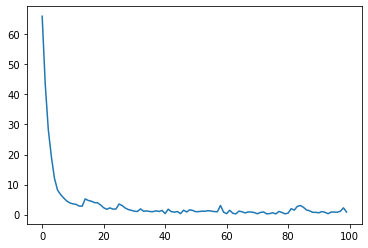

In [14]:
import seaborn as sbn
loss= model.history.history["loss"]
sbn.lineplot(x=range(len(loss)), y=loss)

In [15]:
kayipVerisi = pd.DataFrame(model.history.history)

In [16]:
kayipVerisi.head()

,loss
0,66.037895
1,43.408882
2,28.222000
3,19.212309
4,12.088397


<AxesSubplot:>

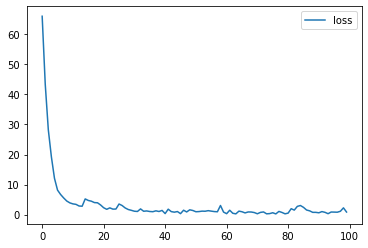

In [17]:
kayipVerisi.plot()

In [18]:
trainLoss= model.evaluate(x_train, y, verbose=0)
trainLoss

1.4348987340927124

In [19]:
"""
#karşılaştıramayız
testLoss = model.evaluate(x_test, y_test, verbose=0)
testLoss
"""

'\n#karşılaştıramayız\ntestLoss = model.evaluate(x_test, y_test, verbose=0)\ntestLoss\n'

In [20]:
testTahminleri = model.predict(x_test)
testTahminleri

array([[113.35713 ],
       [ 37.13611 ],
       [ 37.77768 ],
       ...,
       [ 69.765144],
       [ 64.12006 ],
       [ 66.981895]], dtype=float32)

In [21]:
#tahminleri yazdirma
tahmin = pd.DataFrame(data = testTahminleri, index = range(45504), columns=["ürün fiyatı"])
import sys
tahmin.to_csv(sys.stdout,columns=["ürün fiyatı"])
tahmin.to_csv("predict3.csv")

,ürün fiyatı
0,113.35713
1,37.13611
2,37.77768
3,22.971714
4,40.742912
5,18.355015
6,19.03463
7,43.424217
8,38.8638
9,85.83315
10,13.961327
11,34.911728
12,33.917305
13,28.655685
14,26.471624
15,13.09473
16,40.226883
17,26.900549
18,25.329086
19,19.977947
20,22.888351
21,21.948755
22,42.851093
23,19.314503
24,18.002144
25,12.70322
26,20.6512
27,11.182999
28,24.930857
29,6.338826
30,9.72315
31,8.253082
32,2.508713
33,5.1508636
34,11.913391
35,5.244117
36,20.06746
37,31.819721
38,16.922789
39,12.73282
40,21.194637
41,22.49744
42,11.762715
43,40.92845
44,21.650185
45,54.685806
46,54.528225
47,24.779736
48,40.79531
49,49.86394
50,38.241554
51,38.29913
52,14.027563
53,50.60544
54,80.13043
55,50.929317
56,12.640054
57,18.224989
58,22.338297
59,24.093163
60,12.5176735
61,15.818339
62,21.428782
63,23.278605
64,12.376218
65,16.195484
66,10.685496
67,10.815537
68,25.702002
69,27.841599
70,13.293863
71,17.524778
72,15.48699
73,13.589767
74,47.39279
75,45.3733
76,46.012802
77,53.043404
78,60.48047

3131,38.289364
3132,37.92257
3133,11.880369
3134,48.267628
3135,84.63665
3136,52.774506
3137,12.418261
3138,18.148926
3139,21.185518
3140,21.185831
3141,12.671263
3142,17.026588
3143,21.292048
3144,25.901434
3145,14.326826
3146,15.921781
3147,10.479652
3148,10.219769
3149,26.2242
3150,25.227558
3151,13.268829
3152,16.663643
3153,15.362167
3154,15.274683
3155,45.09977
3156,51.85063
3157,53.72658
3158,53.327667
3159,55.86325
3160,103.1473
3161,36.79474
3162,33.178127
3163,20.658504
3164,45.724792
3165,14.374287
3166,23.832
3167,45.950573
3168,36.51358
3169,76.6951
3170,12.907106
3171,38.131084
3172,33.1288
3173,31.71884
3174,26.481459
3175,12.931139
3176,41.25032
3177,27.82409
3178,27.822044
3179,20.554064
3180,18.264318
3181,21.87997
3182,39.57547
3183,21.682709
3184,16.781239
3185,13.977395
3186,21.529171
3187,11.234082
3188,26.207323
3189,5.958418
3190,9.669608
3191,7.6921062
3192,2.610571
3193,5.212861
3194,11.259127
3195,5.243259
3196,15.159693
3197,34.003517
3198,17.961987
3199,14.

7385,19.125137
7386,12.729279
7387,23.027798
7388,22.99501
7389,12.429848
7390,37.98469
7391,26.393433
7392,52.095913
7393,52.36692
7394,29.04272
7395,45.443253
7396,46.38276
7397,42.461273
7398,40.051743
7399,11.940655
7400,48.557472
7401,85.018715
7402,47.25187
7403,14.237928
7404,16.213083
7405,22.323666
7406,23.174585
7407,12.884383
7408,17.168621
7409,20.758482
7410,23.412584
7411,13.82985
7412,17.977993
7413,9.016116
7414,9.392718
7415,31.70029
7416,26.466568
7417,14.160151
7418,16.399809
7419,16.438747
7420,14.798269
7421,52.267048
7422,53.500134
7423,52.828796
7424,55.3004
7425,66.84832
7426,112.32028
7427,34.283035
7428,35.31124
7429,25.731583
7430,45.485863
7431,18.5428
7432,20.689945
7433,39.28858
7434,34.22356
7435,84.49196
7436,13.374741
7437,36.156204
7438,29.606867
7439,25.34744
7440,24.901785
7441,13.365576
7442,36.944073
7443,30.090729
7444,25.327282
7445,19.5024
7446,20.64525
7447,28.092815
7448,31.449072
7449,20.916042
7450,17.26868
7451,14.748169
7452,22.559002
7453

11628,13.893246
11629,38.877644
11630,26.227514
11631,23.871319
11632,21.16678
11633,18.599173
11634,28.19605
11635,44.608994
11636,22.283302
11637,18.565372
11638,16.112612
11639,20.8665
11640,10.457262
11641,27.744308
11642,7.1442375
11643,10.611362
11644,8.524691
11645,2.9300864
11646,5.4748573
11647,12.55467
11648,5.662798
11649,13.766077
11650,36.494995
11651,20.502886
11652,14.097427
11653,24.456398
11654,22.421282
11655,12.630352
11656,39.373146
11657,30.568003
11658,53.632362
11659,59.158875
11660,28.217289
11661,39.74839
11662,46.737988
11663,40.769398
11664,40.758858
11665,15.240248
11666,60.01966
11667,80.631645
11668,61.388027
11669,15.683932
11670,15.964849
11671,21.585247
11672,24.885221
11673,15.4144335
11674,18.343208
11675,22.190834
11676,23.361645
11677,16.094309
11678,16.325653
11679,9.499117
11680,10.574455
11681,28.049112
11682,26.969955
11683,13.163855
11684,18.019352
11685,19.733051
11686,13.951544
11687,47.730347
11688,51.635345
11689,57.04303
11690,48.914116
11

15840,25.559181
15841,27.404253
15842,12.475235
15843,51.112213
15844,27.416998
15845,50.16818
15846,52.159203
15847,32.197742
15848,44.38672
15849,56.209145
15850,36.334705
15851,35.527657
15852,16.770428
15853,53.303295
15854,90.02346
15855,66.606606
15856,13.303148
15857,19.473541
15858,20.182968
15859,24.774803
15860,13.317793
15861,17.252422
15862,20.968033
15863,24.035149
15864,15.183635
15865,16.839231
15866,10.256273
15867,11.960109
15868,29.960337
15869,35.013245
15870,13.737735
15871,19.156582
15872,17.498852
15873,17.330051
15874,50.545326
15875,57.477104
15876,54.21689
15877,61.298363
15878,57.21754
15879,119.8748
15880,37.77877
15881,32.79212
15882,22.728855
15883,49.685757
15884,18.5386
15885,20.990791
15886,42.235287
15887,41.728268
15888,75.88934
15889,15.771973
15890,37.273804
15891,33.220505
15892,33.368793
15893,28.066933
15894,14.124434
15895,41.843735
15896,27.899822
15897,30.869238
15898,21.087162
15899,21.01313
15900,26.006046
15901,40.64749
15902,22.45015
15903,

20057,14.741756
20058,17.962185
20059,18.258532
20060,15.064133
20061,58.35025
20062,58.826782
20063,56.537178
20064,50.0739
20065,63.554886
20066,115.204216
20067,39.63195
20068,41.53711
20069,23.504154
20070,44.590004
20071,22.638111
20072,24.35426
20073,48.041092
20074,50.27871
20075,84.295876
20076,16.231806
20077,37.988255
20078,30.36211
20079,31.776985
20080,25.485933
20081,14.143267
20082,44.440346
20083,27.007776
20084,27.533642
20085,23.806978
20086,23.324173
20087,29.72689
20088,48.804947
20089,26.376385
20090,18.85233
20091,17.951916
20092,22.18677
20093,10.285831
20094,25.425755
20095,7.6236134
20096,9.63399
20097,8.667128
20098,2.8296368
20099,5.9910984
20100,13.662218
20101,5.8707275
20102,18.019463
20103,37.91902
20104,20.758907
20105,15.042666
20106,25.705326
20107,23.726498
20108,10.6400385
20109,47.60833
20110,30.389227
20111,53.060143
20112,52.306007
20113,31.020393
20114,39.373875
20115,46.36359
20116,45.347836
20117,44.64807
20118,15.019909
20119,55.42091
20120,88.

24427,49.058617
24428,31.792204
24429,30.516335
24430,23.38419
24431,23.590275
24432,25.081291
24433,44.729553
24434,23.592676
24435,20.225739
24436,13.892306
24437,24.396843
24438,12.085539
24439,30.713604
24440,7.401197
24441,10.771707
24442,9.056026
24443,3.299699
24444,6.4264097
24445,14.537752
24446,6.083897
24447,24.567667
24448,35.338276
24449,19.970789
24450,14.058691
24451,25.505861
24452,26.282314
24453,13.269783
24454,46.34932
24455,26.415928
24456,56.676727
24457,59.645386
24458,28.689575
24459,45.023476
24460,42.033676
24461,36.74613
24462,37.763927
24463,15.84239
24464,59.526173
24465,89.64192
24466,74.94497
24467,16.654675
24468,19.584417
24469,22.420792
24470,24.05979
24471,14.498528
24472,19.768276
24473,23.941387
24474,27.033604
24475,14.381908
24476,17.691189
24477,12.470394
24478,11.4158
24479,31.030764
24480,33.43313
24481,16.449926
24482,17.940561
24483,17.355473
24484,14.801448
24485,57.298
24486,57.132797
24487,60.092995
24488,55.22705
24489,66.84844
24490,129.4

28552,5.5386305
28553,14.28126
28554,5.9829082
28555,32.24871
28556,34.053406
28557,19.713346
28558,14.92178
28559,26.456724
28560,26.085274
28561,13.800883
28562,51.597702
28563,29.373669
28564,57.76738
28565,57.70292
28566,32.292774
28567,47.46424
28568,56.660946
28569,47.806187
28570,46.398743
28571,16.678364
28572,61.516487
28573,84.51627
28574,62.884567
28575,14.362136
28576,19.568779
28577,23.460773
28578,32.49733
28579,14.969541
28580,20.4626
28581,22.368702
28582,31.193827
28583,16.12414
28584,19.503227
28585,11.928114
28586,11.7660265
28587,30.63203
28588,29.528
28589,14.892273
28590,19.404232
28591,20.363209
28592,17.864136
28593,45.26461
28594,51.853172
28595,62.377335
28596,60.47017
28597,63.258053
28598,112.31867
28599,38.48504
28600,42.49027
28601,29.264057
28602,47.478195
28603,21.141445
28604,24.780666
28605,47.04679
28606,45.027706
28607,89.65559
28608,16.93686
28609,39.529602
28610,31.497929
28611,33.988983
28612,32.54731
28613,13.941843
28614,48.520264
28615,30.8701


33013,15.249879
33014,18.685226
33015,17.691315
33016,15.07947
33017,49.381157
33018,63.45131
33019,58.16094
33020,65.72355
33021,66.78338
33022,139.67847
33023,40.25595
33024,38.140137
33025,27.058538
33026,54.738106
33027,22.668709
33028,22.96584
33029,52.23049
33030,49.497414
33031,89.36783
33032,17.593334
33033,45.373352
33034,33.243973
33035,31.932293
33036,34.60341
33037,14.561365
33038,46.412243
33039,34.305447
33040,31.957754
33041,22.59625
33042,25.283047
33043,28.914803
33044,44.35467
33045,24.87793
33046,18.93469
33047,17.045963
33048,25.054487
33049,14.309521
33050,31.470465
33051,5.90584
33052,11.005432
33053,8.837423
33054,3.025212
33055,5.867587
33056,14.283802
33057,5.9595985
33058,20.482784
33059,38.355812
33060,22.330791
33061,14.737797
33062,25.93966
33063,23.997482
33064,13.87245
33065,49.791813
33066,31.161781
33067,64.909035
33068,56.849953
33069,31.282288
33070,44.2324
33071,52.595215
33072,42.85572
33073,46.066544
33074,15.922808
33075,56.266296
33076,98.7995
33

37273,21.263775
37274,20.258635
37275,13.189211
37276,12.619932
37277,32.470398
37278,32.057343
37279,17.024643
37280,21.254864
37281,19.544365
37282,19.743927
37283,54.386856
37284,56.618233
37285,64.38708
37286,66.599724
37287,62.554012
37288,124.653145
37289,43.083397
37290,39.813995
37291,26.53535
37292,54.663994
37293,19.257109
37294,29.920979
37295,55.17404
37296,45.18582
37297,95.49479
37298,17.542688
37299,44.902344
37300,40.246864
37301,37.412724
37302,35.27697
37303,15.882404
37304,50.775784
37305,34.273224
37306,33.99395
37307,24.592537
37308,22.93295
37309,26.069916
37310,48.151775
37311,29.74308
37312,22.545982
37313,17.532887
37314,26.358847
37315,15.093575
37316,32.078156
37317,8.876468
37318,12.165451
37319,9.141882
37320,3.1702824
37321,6.1424356
37322,13.454144
37323,6.3890743
37324,18.456196
37325,39.74698
37326,24.505333
37327,17.247179
37328,30.453583
37329,25.357367
37330,15.073008
37331,45.6664
37332,30.428205
37333,70.92663
37334,64.53736
37335,31.294014
37336,4

41761,58.78857
41762,48.74141
41763,47.93452
41764,18.694817
41765,65.04416
41766,104.73209
41767,60.205055
41768,17.38332
41769,23.985199
41770,27.88906
41771,30.433964
41772,16.418594
41773,22.15118
41774,28.271519
41775,29.799612
41776,16.061705
41777,20.619305
41778,14.05027
41779,14.000526
41780,36.036694
41781,36.766357
41782,17.48059
41783,22.435467
41784,19.56855
41785,18.626957
41786,64.90661
41787,60.448315
41788,65.50041
41789,65.7902
41790,73.752464
41791,135.7884
41792,47.69696
41793,56.803825
41794,30.452236
41795,57.57235
41796,23.883694
41797,25.584255
41798,51.070885
41799,48.70441
41800,90.8635
41801,15.9948015
41802,46.698116
41803,43.10108
41804,31.854881
41805,36.40394
41806,17.265167
41807,48.14679
41808,34.830643
41809,32.985466
41810,28.55069
41811,29.32012
41812,34.599678
41813,51.191418
41814,30.04054
41815,24.028206
41816,19.797756
41817,28.571913
41818,17.95807
41819,30.49073
41820,10.086872
41821,11.530678
41822,10.108761
41823,3.3508132
41824,6.771976
4182